In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from itertools import combinations

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.diagnostic as dg
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('SBER_1day.txt', sep=",", parse_dates=['<DATE>'])
data

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,SBER,D,2021-01-04,0,274.67,276.60,270.61,272.00,48799460
1,SBER,D,2021-01-05,0,272.67,275.70,270.28,275.20,45554100
2,SBER,D,2021-01-06,0,275.90,275.92,271.62,272.93,40905340
3,SBER,D,2021-01-08,0,275.11,283.99,275.11,283.64,88672940
4,SBER,D,2021-01-11,0,282.75,292.95,279.48,289.49,112210400
...,...,...,...,...,...,...,...,...,...
584,SBER,D,2023-05-22,0,232.20,232.78,230.00,231.00,26351890
585,SBER,D,2023-05-23,0,231.24,237.29,230.21,236.43,62996030
586,SBER,D,2023-05-24,0,237.49,246.13,236.26,246.06,85850770
587,SBER,D,2023-05-25,0,246.11,247.40,242.65,243.76,70582820


In [3]:
data.columns = ["Ticker", "Per", "Date", "Time", "Open", "High", "Low", "Price", "Volume"]

In [4]:
# data = data.iloc[1:,:]

In [5]:
data

,Ticker,Per,Date,Time,Open,High,Low,Price,Volume
0,SBER,D,2021-01-04,0,274.67,276.60,270.61,272.00,48799460
1,SBER,D,2021-01-05,0,272.67,275.70,270.28,275.20,45554100
2,SBER,D,2021-01-06,0,275.90,275.92,271.62,272.93,40905340
3,SBER,D,2021-01-08,0,275.11,283.99,275.11,283.64,88672940
4,SBER,D,2021-01-11,0,282.75,292.95,279.48,289.49,112210400
...,...,...,...,...,...,...,...,...,...
584,SBER,D,2023-05-22,0,232.20,232.78,230.00,231.00,26351890
585,SBER,D,2023-05-23,0,231.24,237.29,230.21,236.43,62996030
586,SBER,D,2023-05-24,0,237.49,246.13,236.26,246.06,85850770
587,SBER,D,2023-05-25,0,246.11,247.40,242.65,243.76,70582820


In [6]:
data[["Open", "High", "Low", "Price", "Volume"]] = data[["Open", "High", "Low", "Price", "Volume"]].astype(float)

In [7]:
#from datetime import date
#data = data.astype({'Date': datetime64[ns]})

In [8]:
data

,Ticker,Per,Date,Time,Open,High,Low,Price,Volume
0,SBER,D,2021-01-04,0,274.67,276.60,270.61,272.00,48799460.0
1,SBER,D,2021-01-05,0,272.67,275.70,270.28,275.20,45554100.0
2,SBER,D,2021-01-06,0,275.90,275.92,271.62,272.93,40905340.0
3,SBER,D,2021-01-08,0,275.11,283.99,275.11,283.64,88672940.0
4,SBER,D,2021-01-11,0,282.75,292.95,279.48,289.49,112210400.0
...,...,...,...,...,...,...,...,...,...
584,SBER,D,2023-05-22,0,232.20,232.78,230.00,231.00,26351890.0
585,SBER,D,2023-05-23,0,231.24,237.29,230.21,236.43,62996030.0
586,SBER,D,2023-05-24,0,237.49,246.13,236.26,246.06,85850770.0
587,SBER,D,2023-05-25,0,246.11,247.40,242.65,243.76,70582820.0


In [9]:
data['Returns'] = np.log(data['Price']) - np.log(data['Price'].shift(1))

In [10]:
data

,Ticker,Per,Date,Time,Open,High,Low,Price,Volume,Returns
0,SBER,D,2021-01-04,0,274.67,276.60,270.61,272.00,48799460.0,NaN
1,SBER,D,2021-01-05,0,272.67,275.70,270.28,275.20,45554100.0,0.011696
2,SBER,D,2021-01-06,0,275.90,275.92,271.62,272.93,40905340.0,-0.008283
3,SBER,D,2021-01-08,0,275.11,283.99,275.11,283.64,88672940.0,0.038490
4,SBER,D,2021-01-11,0,282.75,292.95,279.48,289.49,112210400.0,0.020415
...,...,...,...,...,...,...,...,...,...,...
584,SBER,D,2023-05-22,0,232.20,232.78,230.00,231.00,26351890.0,-0.001168
585,SBER,D,2023-05-23,0,231.24,237.29,230.21,236.43,62996030.0,0.023234
586,SBER,D,2023-05-24,0,237.49,246.13,236.26,246.06,85850770.0,0.039923
587,SBER,D,2023-05-25,0,246.11,247.40,242.65,243.76,70582820.0,-0.009391


In [11]:
p_dful = []
result = []

p_dful.append(adfuller(data['Returns'].dropna())[1])
if adfuller(data['Returns'].dropna())[1] < 0.05: 
    result.append('stationary')
else: result.append('non-stationary')

variable = ['Returns']      
zipped = list(zip(variable, p_dful, result))
pd.DataFrame(zipped, columns = ['Variable', 'p-value', 'Result'])

,Variable,p-value,Result
0,Returns,3.714794e-22,stationary


In [14]:
 adfuller(data['Returns'].dropna())[0]

-11.980488230429327

In [74]:
data["Week"] = 1
data["Year"] = 1

In [75]:
data

,Ticker,Per,Date,Time,Open,High,Low,Price,Volume,Returns,Week,Year
0,SBER,D,2021-01-04,0,274.67,276.60,270.61,272.00,48799460.0,NaN,1,1
1,SBER,D,2021-01-05,0,272.67,275.70,270.28,275.20,45554100.0,0.011696,1,1
2,SBER,D,2021-01-06,0,275.90,275.92,271.62,272.93,40905340.0,-0.008283,1,1
3,SBER,D,2021-01-08,0,275.11,283.99,275.11,283.64,88672940.0,0.038490,1,1
4,SBER,D,2021-01-11,0,282.75,292.95,279.48,289.49,112210400.0,0.020415,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
584,SBER,D,2023-05-22,0,232.20,232.78,230.00,231.00,26351890.0,-0.001168,1,1
585,SBER,D,2023-05-23,0,231.24,237.29,230.21,236.43,62996030.0,0.023234,1,1
586,SBER,D,2023-05-24,0,237.49,246.13,236.26,246.06,85850770.0,0.039923,1,1
587,SBER,D,2023-05-25,0,246.11,247.40,242.65,243.76,70582820.0,-0.009391,1,1


In [76]:
for i in range(0,589):
    data.Week[i] = data["Date"][i].isocalendar()[1]

In [77]:
for i in range(0,589):
    data.Year[i] = data["Date"][i].isocalendar()[0]

In [78]:
data["Week_Year"] = 1
for i in range(0,589):
    data["Week_Year"][i] = str(data.Week[i])+" "+str(data.Year[i])
data

,Ticker,Per,Date,Time,Open,High,Low,Price,Volume,Returns,Week,Year,Week_Year
0,SBER,D,2021-01-04,0,274.67,276.60,270.61,272.00,48799460.0,NaN,1,2021,1 2021
1,SBER,D,2021-01-05,0,272.67,275.70,270.28,275.20,45554100.0,0.011696,1,2021,1 2021
2,SBER,D,2021-01-06,0,275.90,275.92,271.62,272.93,40905340.0,-0.008283,1,2021,1 2021
3,SBER,D,2021-01-08,0,275.11,283.99,275.11,283.64,88672940.0,0.038490,1,2021,1 2021
4,SBER,D,2021-01-11,0,282.75,292.95,279.48,289.49,112210400.0,0.020415,2,2021,2 2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,SBER,D,2023-05-22,0,232.20,232.78,230.00,231.00,26351890.0,-0.001168,21,2023,21 2023
585,SBER,D,2023-05-23,0,231.24,237.29,230.21,236.43,62996030.0,0.023234,21,2023,21 2023
586,SBER,D,2023-05-24,0,237.49,246.13,236.26,246.06,85850770.0,0.039923,21,2023,21 2023
587,SBER,D,2023-05-25,0,246.11,247.40,242.65,243.76,70582820.0,-0.009391,21,2023,21 2023


In [79]:
dff = pd.DataFrame(data["Week_Year"].unique()).reset_index()
dff.columns = ["week#", "Week_Year"]
data = pd.merge(data, dff, on=["Week_Year"])
data

,Ticker,Per,Date,Time,Open,High,Low,Price,Volume,Returns,Week,Year,Week_Year,week#
0,SBER,D,2021-01-04,0,274.67,276.60,270.61,272.00,48799460.0,NaN,1,2021,1 2021,0
1,SBER,D,2021-01-05,0,272.67,275.70,270.28,275.20,45554100.0,0.011696,1,2021,1 2021,0
2,SBER,D,2021-01-06,0,275.90,275.92,271.62,272.93,40905340.0,-0.008283,1,2021,1 2021,0
3,SBER,D,2021-01-08,0,275.11,283.99,275.11,283.64,88672940.0,0.038490,1,2021,1 2021,0
4,SBER,D,2021-01-11,0,282.75,292.95,279.48,289.49,112210400.0,0.020415,2,2021,2 2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,SBER,D,2023-05-22,0,232.20,232.78,230.00,231.00,26351890.0,-0.001168,21,2023,21 2023,121
585,SBER,D,2023-05-23,0,231.24,237.29,230.21,236.43,62996030.0,0.023234,21,2023,21 2023,121
586,SBER,D,2023-05-24,0,237.49,246.13,236.26,246.06,85850770.0,0.039923,21,2023,21 2023,121
587,SBER,D,2023-05-25,0,246.11,247.40,242.65,243.76,70582820.0,-0.009391,21,2023,21 2023,121


In [80]:
# data.loc[data['Date'] == "2023-04-21"]
# data.loc[data['Week_Year'] == "8 2022"]
# data.loc[data['Week_Year'].isin(some_values)]

# data.loc[data['week#'] == 2]
# data.loc[data['week#'] == 6]
# data.loc[data['week#'] == 10]
# data.loc[data['week#'] == 13]
# data.loc[data['week#'] == 34]
data.loc[data['week#'] == 59]

,Ticker,Per,Date,Time,Open,High,Low,Price,Volume,Returns,Week,Year,Week_Year,week#
289,SBER,D,2022-02-21,0,249.12,258.32,184.30,201.00,1.084339e+09,-0.219275,8,2022,8 2022,59
290,SBER,D,2022-02-22,0,198.72,219.90,182.03,208.53,9.459417e+08,0.036778,8,2022,8 2022,59
291,SBER,D,2022-02-24,0,186.58,187.54,89.59,132.18,8.283294e+08,-0.455918,8,2022,8 2022,59
292,SBER,D,2022-02-25,0,123.75,152.89,115.11,131.12,3.962872e+08,-0.008052,8,2022,8 2022,59


In [81]:
# df = pd.DataFrame(data["Week_Year"].unique()).reset_index()
# df.columns = ["week#", "Week_Year"]
# data = pd.merge(data, df, on=["Week_Year"])
# data

In [82]:
df1 = pd.DataFrame(data.groupby(['week#'])['Returns'].std()*np.sqrt(5))
# df1 = df1.reset_index()
df1.columns = ['Volatility']
df1['Week'] = df1.index
df1

,Volatility,Week
week#,,
0,0.052479,0
1,0.044366,1
2,0.032904,2
3,0.038088,3
4,0.027380,4
...,...,...
117,0.021727,117
118,0.042281,118
119,0.059185,119


In [83]:
df2 = data.groupby(['week#'])['Volume'].sum()
df2 = pd.DataFrame(df2)
# df2 = df2.reset_index()
df2['Week'] = df2.index
df2

,Volume,Week
week#,,
0,223931840.0,0
1,406894300.0,1
2,347882970.0,2
3,490322970.0,3
4,370567540.0,4
...,...,...
117,204540210.0,117
118,274309360.0,118
119,468680170.0,119


In [84]:
data

,Ticker,Per,Date,Time,Open,High,Low,Price,Volume,Returns,Week,Year,Week_Year,week#
0,SBER,D,2021-01-04,0,274.67,276.60,270.61,272.00,48799460.0,NaN,1,2021,1 2021,0
1,SBER,D,2021-01-05,0,272.67,275.70,270.28,275.20,45554100.0,0.011696,1,2021,1 2021,0
2,SBER,D,2021-01-06,0,275.90,275.92,271.62,272.93,40905340.0,-0.008283,1,2021,1 2021,0
3,SBER,D,2021-01-08,0,275.11,283.99,275.11,283.64,88672940.0,0.038490,1,2021,1 2021,0
4,SBER,D,2021-01-11,0,282.75,292.95,279.48,289.49,112210400.0,0.020415,2,2021,2 2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,SBER,D,2023-05-22,0,232.20,232.78,230.00,231.00,26351890.0,-0.001168,21,2023,21 2023,121
585,SBER,D,2023-05-23,0,231.24,237.29,230.21,236.43,62996030.0,0.023234,21,2023,21 2023,121
586,SBER,D,2023-05-24,0,237.49,246.13,236.26,246.06,85850770.0,0.039923,21,2023,21 2023,121
587,SBER,D,2023-05-25,0,246.11,247.40,242.65,243.76,70582820.0,-0.009391,21,2023,21 2023,121


In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(20, 20))
sns.barplot(x="Week", y="Returns", data=df1)
plt.xticks(rotation=45)

In [86]:
# ax = df1.plot.bar(x="Week", y="Returns", legend=False)
# ax2 = ax.twinx()
# df2.plot.bar(x="Week", y="Volume", ax=ax2, legend=False, color="r")
# ax.figure.legend()
# plt.show()

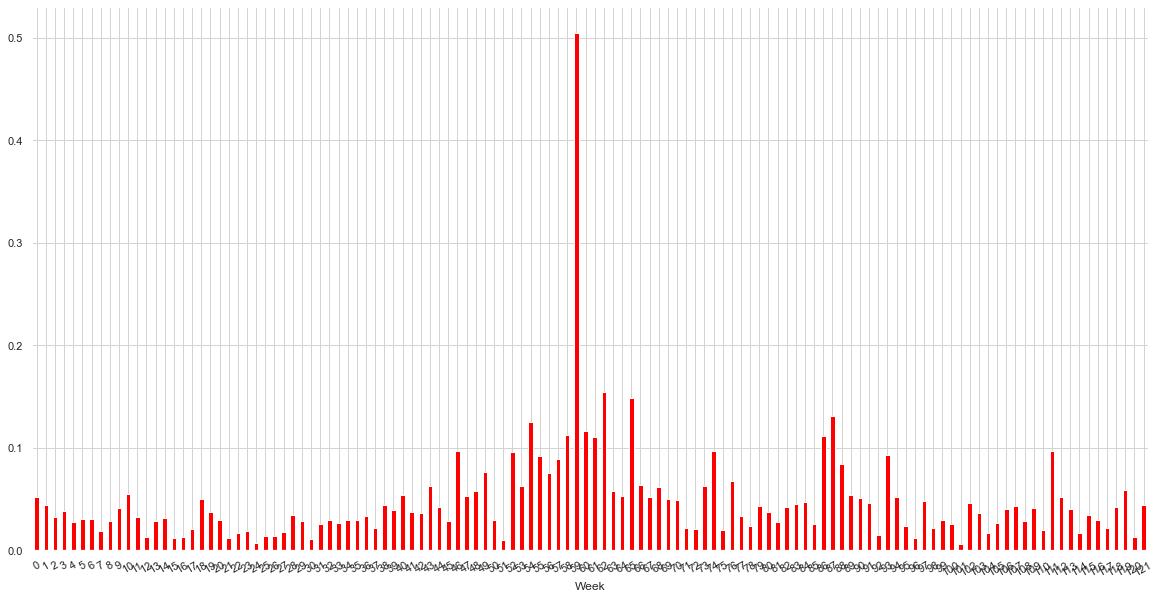

In [87]:
df1.plot.bar(x="Week", y="Volatility", color='red', legend=False, figsize=(20, 10), rot=30)
ax = plt.axes()
ax.set_facecolor("white")
plt.grid(color="lightgrey")
plt.show()

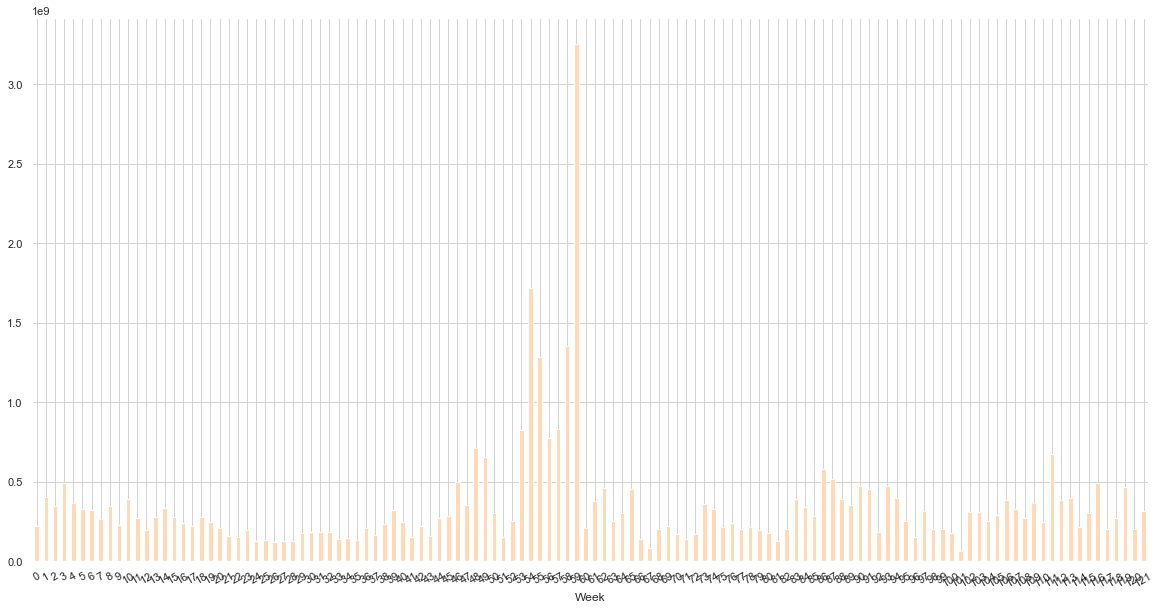

In [88]:
df2.plot.bar(x="Week", y="Volume", color="peachpuff", legend=False, figsize=(20, 10), rot=30)
ax = plt.axes()
ax.set_facecolor("white")
plt.grid(color="lightgrey")
plt.show()


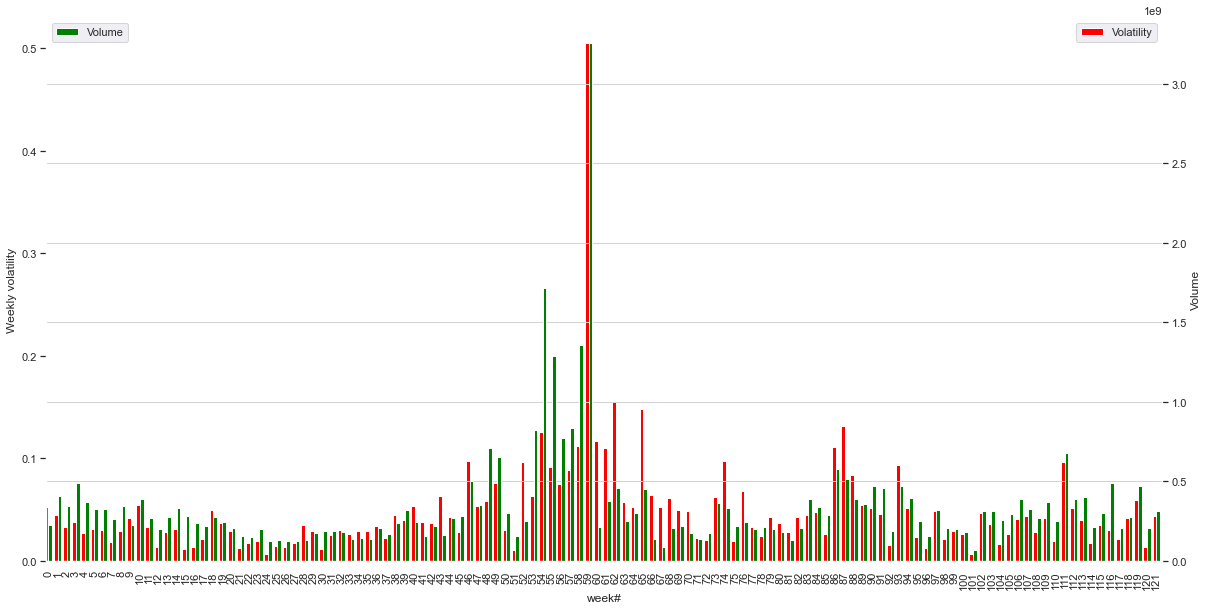

In [130]:
fig = plt.figure(figsize=(20, 10)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

df1.Volatility.plot(kind='bar', color='red', ax=ax, width=width, position=1, legend=True)
df2.Volume.plot(kind='bar', color='green', ax=ax2, width=width, position=0, legend=True)
plt.legend(loc='upper left')

ax.set_ylabel('Weekly volatility')
ax2.set_ylabel('Volume')


ax.set_facecolor("white")
plt.grid(color="lightgrey")


plt.show()

# TEST

In [131]:
df1.describe()

,Volatility,Week
count,122.000000,122.000000
mean,0.048890,60.500000
std,0.051415,35.362409
min,0.006744,0.000000
25%,0.025800,30.250000
50%,0.037407,60.500000
75%,0.053747,90.750000
max,0.504778,121.000000


In [91]:
df2.describe()

,Volume,Week
count,1.220000e+02,122.000000
mean,3.466641e+08,60.500000
std,3.542459e+08,35.362409
min,6.600507e+07,0.000000
25%,1.999461e+08,30.250000
50%,2.684847e+08,60.500000
75%,3.703358e+08,90.750000
max,3.254897e+09,121.000000


In [92]:
data.describe()

,Time,Open,High,Low,Price,Volume,Returns,Week,Year,week#
count,589.0,589.000000,589.000000,589.000000,589.000000,5.890000e+02,588.000000,589.000000,589.000000,589.000000
mean,0.0,225.564177,228.614720,221.969355,225.446486,7.180479e+07,-0.000156,24.475382,2021.736842,60.283531
std,0.0,84.012387,84.413611,83.471879,83.944584,8.492074e+07,0.031547,15.107263,0.731007,35.321932
min,0.0,96.550000,106.770000,89.590000,101.500000,8.738250e+06,-0.455918,1.000000,2021.000000,0.000000
25%,0.0,136.780000,138.350000,134.300000,136.610000,3.574107e+07,-0.008934,12.000000,2021.000000,30.000000
50%,0.0,237.490000,242.990000,234.100000,237.700000,5.225906e+07,0.000681,23.000000,2022.000000,60.000000
75%,0.0,301.190000,304.260000,295.890000,300.700000,7.842011e+07,0.011648,37.000000,2022.000000,91.000000
max,0.0,385.900000,388.110000,376.720000,387.600000,1.084339e+09,0.098388,52.000000,2023.000000,121.000000


In [93]:
data["Returns"].skew()

-5.76434017148578

In [94]:
data["Returns"].kurtosis()

77.87174089355648

In [95]:
dt = pd.read_csv('SBER_test.txt', sep=",", parse_dates=['<DATE>'])
dt

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,SBER,D,2018-01-03,0,226.88,232.70,226.35,231.90,34460110
1,SBER,D,2018-01-04,0,232.13,239.50,231.00,238.80,53575900
2,SBER,D,2018-01-05,0,238.85,239.95,236.70,238.60,31546930
3,SBER,D,2018-01-09,0,239.04,243.76,239.01,240.40,53158280
4,SBER,D,2018-01-10,0,240.41,241.25,237.06,237.76,39353510
...,...,...,...,...,...,...,...,...,...
1339,SBER,D,2023-05-19,0,230.98,232.30,229.81,231.27,31540330
1340,SBER,D,2023-05-22,0,232.20,232.78,230.00,231.00,26351890
1341,SBER,D,2023-05-23,0,231.24,237.29,230.21,236.43,62996030
1342,SBER,D,2023-05-24,0,237.49,246.13,236.26,246.06,85850770


In [96]:
dt.columns = ["Ticker", "Per", "Date", "Time", "Open", "High", "Low", "Price", "Volume"]

In [97]:
dt

,Ticker,Per,Date,Time,Open,High,Low,Price,Volume
0,SBER,D,2018-01-03,0,226.88,232.70,226.35,231.90,34460110
1,SBER,D,2018-01-04,0,232.13,239.50,231.00,238.80,53575900
2,SBER,D,2018-01-05,0,238.85,239.95,236.70,238.60,31546930
3,SBER,D,2018-01-09,0,239.04,243.76,239.01,240.40,53158280
4,SBER,D,2018-01-10,0,240.41,241.25,237.06,237.76,39353510
...,...,...,...,...,...,...,...,...,...
1339,SBER,D,2023-05-19,0,230.98,232.30,229.81,231.27,31540330
1340,SBER,D,2023-05-22,0,232.20,232.78,230.00,231.00,26351890
1341,SBER,D,2023-05-23,0,231.24,237.29,230.21,236.43,62996030
1342,SBER,D,2023-05-24,0,237.49,246.13,236.26,246.06,85850770


In [98]:
dt["Year"] = 1
for i in range(0,len(dt.Date)):
    dt["Year"][i] = dt["Date"][i].isocalendar()[0]

In [99]:
dt['Returns'] = np.log(dt['Price']) - np.log(dt['Price'].shift(1))

<AxesSubplot:xlabel='Returns', ylabel='Count'>

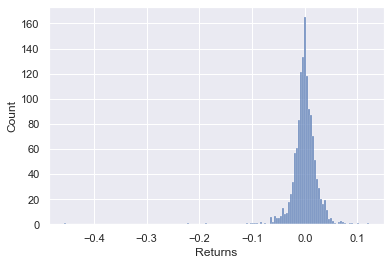

In [100]:
sns.histplot(data=dt, x="Returns")

<AxesSubplot:xlabel='Date', ylabel='Returns'>

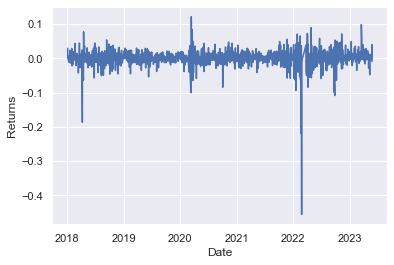

In [101]:
sns.lineplot(data=dt, y="Returns", x="Date")

In [102]:
dt = dt.loc[756:]

<AxesSubplot:xlabel='Date', ylabel='Returns'>

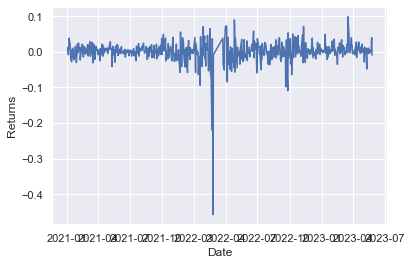

In [103]:
sns.lineplot(data=dt, y="Returns", x="Date")

<AxesSubplot:xlabel='Returns', ylabel='Count'>

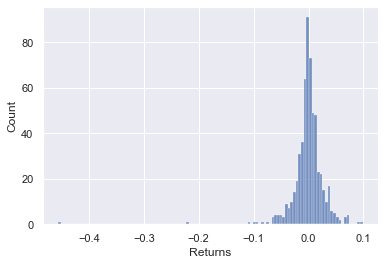

In [104]:
sns.histplot(data=dt, x="Returns")

In [105]:
dt = dt.reset_index()
dt["Time"] = dt.index
dt

,index,Ticker,Per,Date,Time,Open,High,Low,Price,Volume,Year,Returns
0,756,SBER,D,2021-01-04,0,274.67,276.60,270.61,272.00,48799460,2021,0.001288
1,757,SBER,D,2021-01-05,1,272.67,275.70,270.28,275.20,45554100,2021,0.011696
2,758,SBER,D,2021-01-06,2,275.90,275.92,271.62,272.93,40905340,2021,-0.008283
3,759,SBER,D,2021-01-08,3,275.11,283.99,275.11,283.64,88672940,2021,0.038490
4,760,SBER,D,2021-01-11,4,282.75,292.95,279.48,289.49,112210400,2021,0.020415
...,...,...,...,...,...,...,...,...,...,...,...,...
583,1339,SBER,D,2023-05-19,583,230.98,232.30,229.81,231.27,31540330,2023,-0.001858
584,1340,SBER,D,2023-05-22,584,232.20,232.78,230.00,231.00,26351890,2023,-0.001168
585,1341,SBER,D,2023-05-23,585,231.24,237.29,230.21,236.43,62996030,2023,0.023234
586,1342,SBER,D,2023-05-24,586,237.49,246.13,236.26,246.06,85850770,2023,0.039923


In [106]:
dt.loc[dt["Date"]=='2022-02-24'] # T=291

,index,Ticker,Per,Date,Time,Open,High,Low,Price,Volume,Year,Returns
291,1047,SBER,D,2022-02-24,291,186.58,187.54,89.59,132.18,828329350,2022,-0.455918


In [107]:
dt

,index,Ticker,Per,Date,Time,Open,High,Low,Price,Volume,Year,Returns
0,756,SBER,D,2021-01-04,0,274.67,276.60,270.61,272.00,48799460,2021,0.001288
1,757,SBER,D,2021-01-05,1,272.67,275.70,270.28,275.20,45554100,2021,0.011696
2,758,SBER,D,2021-01-06,2,275.90,275.92,271.62,272.93,40905340,2021,-0.008283
3,759,SBER,D,2021-01-08,3,275.11,283.99,275.11,283.64,88672940,2021,0.038490
4,760,SBER,D,2021-01-11,4,282.75,292.95,279.48,289.49,112210400,2021,0.020415
...,...,...,...,...,...,...,...,...,...,...,...,...
583,1339,SBER,D,2023-05-19,583,230.98,232.30,229.81,231.27,31540330,2023,-0.001858
584,1340,SBER,D,2023-05-22,584,232.20,232.78,230.00,231.00,26351890,2023,-0.001168
585,1341,SBER,D,2023-05-23,585,231.24,237.29,230.21,236.43,62996030,2023,0.023234
586,1342,SBER,D,2023-05-24,586,237.49,246.13,236.26,246.06,85850770,2023,0.039923


In [108]:
# IMOEX_test.txt
ms = pd.read_csv('IMOEX_test.txt', sep=",", parse_dates=['<DATE>'])
ms.columns = ["Ticker", "Per", "Date", "Time", "Open", "High", "Low", "Price", "Volume"]
ms

,Ticker,Per,Date,Time,Open,High,Low,Price,Volume
0,IMOEX,D,2021-01-04,0,3304.75,3350.81,3304.17,3350.51,66835524820
1,IMOEX,D,2021-01-05,0,3326.06,3365.32,3301.88,3359.15,71655035538
2,IMOEX,D,2021-01-06,0,3375.91,3380.63,3344.43,3371.03,71374633095
3,IMOEX,D,2021-01-08,0,3399.23,3474.66,3397.15,3454.82,131904843837
4,IMOEX,D,2021-01-11,0,3449.91,3516.90,3436.66,3482.48,143248254278
...,...,...,...,...,...,...,...,...,...
584,IMOEX,D,2023-05-19,0,2627.00,2635.80,2612.47,2626.16,58832351511
585,IMOEX,D,2023-05-22,0,2648.30,2652.59,2622.43,2633.26,47570581512
586,IMOEX,D,2023-05-23,0,2641.05,2647.18,2607.66,2641.66,71916771187
587,IMOEX,D,2023-05-24,0,2643.73,2659.68,2626.58,2654.99,71733180049


In [109]:
ms['Returns'] = np.log(ms['Price']) - np.log(ms['Price'].shift(1))

In [110]:
ms.Returns[1:]

1      0.002575
2      0.003530
3      0.024552
4      0.007974
5     -0.003115
         ...   
584   -0.002567
585    0.002700
586    0.003185
587    0.005033
588   -0.001889
Name: Returns, Length: 588, dtype: float64

In [111]:
y = dt.Returns[1:]

In [112]:
def get_ols(X):
    '''Function for getting OLS Regression model with intercept'''
    x = sm.add_constant(X)
    model = sm.OLS(y, x).fit()
    return model

In [113]:
merged = pd.merge(dt[["Date", "Returns"]], ms[["Date", "Returns"]], on=["Date"])

In [114]:
y = merged.dropna()["Returns_x"]

In [115]:
model = get_ols(merged.dropna()["Returns_y"])

In [116]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Returns_x   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     1357.
Date:                Fri, 09 Jun 2023   Prob (F-statistic):          1.41e-154
Time:                        15:10:51   Log-Likelihood:                 1548.3
No. Observations:                 587   AIC:                            -3093.
Df Residuals:                     585   BIC:                            -3084.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.001      0.353      0.724      -0.001       0.002
Returns_y      1.0774      0.029     36.843      0.000       1.020       1.135
==============================================================================
Omnibus:                      461.394   Durbin-Watson:                   2.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31658.888
Skew:                          -2.858   Prob(JB):                         0.00
Kurtosis:                      38.521   Cond. No.                         40.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='Returns_y', ylabel='Returns_x'>

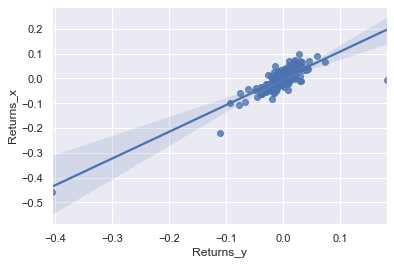

In [117]:
sns.regplot(x="Returns_y", y="Returns_x", data=merged.dropna())

In [118]:
residuals = model.resid

In [119]:
y = residuals

In [120]:
dd = pd.DataFrame()
dd["Date"] = merged.dropna()["Date"]
dd["Date"][291]
dd["Dummy"] = 0
for i in range(291, len(dd["Date"])+1):
    dd["Dummy"][i] = 1

In [121]:
model1 = get_ols(dd["Dummy"])

In [122]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.360
Date:                Fri, 09 Jun 2023   Prob (F-statistic):              0.244
Time:                        15:10:52   Log-Likelihood:                 1549.0
No. Observations:                 587   AIC:                            -3094.
Df Residuals:                     585   BIC:                            -3085.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0008      0.001     -0.830      0.407      -0.003       0.001
Dummy          0.0017      0.001      1.166      0.244      -0.001       0.004
==============================================================================
Omnibus:                      467.999   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32774.408
Skew:                          -2.919   Prob(JB):                         0.00
Kurtosis:                      39.138   Cond. No.                         2.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='Returns', ylabel='Count'>

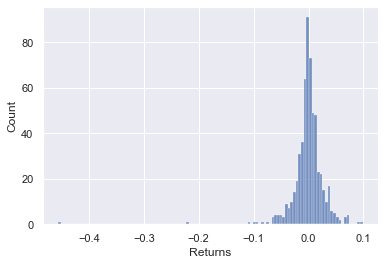

In [123]:
sns.histplot(data=dt, x="Returns")

In [124]:
ret = list(dt["Returns"].dropna())

name = ['Jarque-Bera', 'P-value', 'Skew', 'Kurtosis']
test = statsmodels.stats.stattools.jarque_bera(ret)
dict(zip(name, test))

{'Jarque-Bera': 149512.4101689758,
 'P-value': 0.0,
 'Skew': -5.751941370004569,
 'Kurtosis': 80.26712131133051}

In [125]:
# Shapiro normality test
stat, p = shapiro(ret)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    

Statistics=0.687, p=0.000
Sample does not look Gaussian (reject H0)


In [126]:
from scipy.stats import norm,t
t.fit(np.array(ret))
print("Parameters from t.fit: ", t.fit(np.array(ret)), "\n") # degrees of freedom, mean, st dev
norm.fit(np.array(ret))
print("Parameters from norm.fit: ", norm.fit(np.array(ret)), "\n")

Parameters from t.fit:  (2.1659923212703456, 0.0009521860121869842, 0.013501631611837582) 

Parameters from norm.fit:  (-0.0001842352692518337, 0.03151136426058621) 



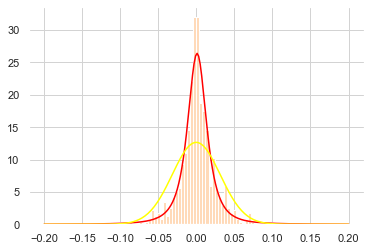

In [127]:
x_min = -0.2
x_max = 0.2
x_t=np.linspace(x_min, x_max, 200)
y_t=t.pdf(x_t, 2.1659923212703456, loc=0.0009521860121869842, scale=0.013501631611837582)
x_n=np.linspace(x_min, x_max, 200)
y_n=norm.pdf(x_n, loc=-0.0001842352692518337, scale=0.03151136426058621)
plt.plot(x_t,y_t,c='red')
plt.plot(x_n,y_n,c='yellow')
plt.hist(ret, bins=100, range=(x_min, x_max), density=True, color="peachpuff") #"thistle"
ax = plt.axes()
ax.set_facecolor("white")
plt.grid(color="lightgrey")
plt.show()

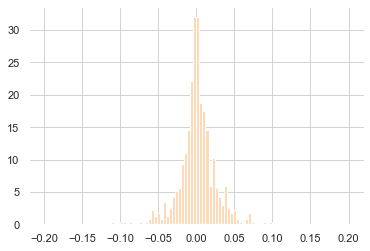

In [128]:
x_min = -0.2
x_max = 0.2
plt.hist(ret, bins=100, range=(x_min, x_max), density=True, color="peachpuff") #"thistle"
ax = plt.axes()
ax.set_facecolor("white")
plt.grid(color="lightgrey")
plt.show()

In [129]:
from scipy.stats import t
import numpy as np

data_df = np.array(ret)

# Define the likelihood function for a t-distribution
def likelihood(df):
    return t.logpdf(data_df, df).sum()

# Use optimization to find the value of df that maximizes the likelihood
from scipy.optimize import minimize_scalar
res = minimize_scalar(lambda df: -likelihood(df), bounds=(1e-5, 100), method='bounded')
df_est = res.x

# Print the estimate of df
print("Estimated degrees of freedom:", df_est)

Estimated degrees of freedom: 99.99999455545948
